In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_FILE = 'data.csv'

data = pd.read_csv(DATA_FILE)

,Repeat Instance,ALT (U/L),AST (U/L),Phosphatase Alcaline (U/L),Créatinine (uM),Albumine (g/L),Plaquettes,Hospit due à EH
0,1,23,40,59,42,21,98,1
1,1,24,35,122,84,11,94,1
2,1,25,63,107,168,37,105,1
3,1,21,47,106,82,27,106,1
4,1,62,105,76,690,21,27,1


In [3]:
X = data.iloc[:,0:-1].values
Y = data.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [6]:
from sklearn.svm import SVC
model_SVC = SVC(kernel='rbf', random_state=4)
model_SVC.fit(X_train, Y_train)
Y_pred_svm = model_SVC.decision_function(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, Y_train)

Y_pred_logistic = model_logistic.decision_function(X_test)

In [8]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train, Y_train)
Y_pred_tree = model_tree.predict_proba(X_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, Y_train)
Y_pred_rfc = model_rfc.predict_proba(X_test)

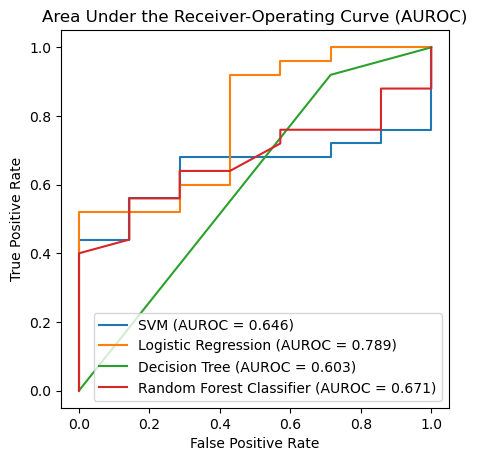

In [10]:
from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr, threshold = roc_curve(Y_test, Y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

logistic_fpr, logistic_tpr, threshold = roc_curve(Y_test, Y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

tree_fpr, tree_tpr, threshold = roc_curve(Y_test, Y_pred_tree[:,1])
auc_tree = auc(tree_fpr, tree_tpr)

rfc_fpr, rfc_tpr, threshold = roc_curve(Y_test, Y_pred_rfc[:,1])
auc_rfc = auc(rfc_fpr, rfc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (AUROC = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label='Logistic Regression (AUROC = %0.3f)' % auc_logistic)
plt.plot(tree_fpr, tree_tpr, linestyle='-', label='Decision Tree (AUROC = %0.3f)' % auc_tree)
plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label='Random Forest Classifier (AUROC = %0.3f)' % auc_rfc)

plt.title("Area Under the Receiver-Operating Curve (AUROC)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()

plt.show()